# Hurricane Data Mining #
Evan Solomonides

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm

In [2]:
storms = pd.read_csv('C:/Users/esolo/Downloads/atlantic.csv')
print list(storms)

['ID', 'Name', 'Date', 'Time', 'Event', 'Status', 'Latitude', 'Longitude', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']


In [3]:
allids = storms['ID']
alllats = storms['Latitude']
alllongs = storms['Longitude']
allstatus = storms['Status']
alldates = storms['Date']
allmaxwind = storms['Maximum Wind']
ids = []
lats = []
longs = []
startstatus = []
startdates = []
maxwind = []
everishurricane = []
for i in range(np.size(allids)):
    if allids[i] not in ids:
        ids.append(allids[i])
        lats.append(alllats[i])
        longs.append(alllongs[i])
        startstatus.append(allstatus[i])
        startdates.append(alldates[i])
        maxwind.append(np.maximum(allmaxwind[i], 50))
        thisid = np.where(np.array(allids) == ids[-1])
        thesestatus = np.array(allstatus)[thisid]
        if ' HU' in thesestatus:
            everishurricane.append(1)
        else:
            everishurricane.append(0)
print np.size(ids)

dict = {'Date (Month)': [int(np.floor(np.mod(d, 10000)/100)) for d in startdates], 'Month from 9': [np.abs(9 - int(np.floor(np.mod(d, 10000)/100))) for d in startdates], 'Lat (N)': [float(l[:-1]) for l in lats], 'Lat from 20': [np.abs(float(l[:-1]) - 20) for l in lats], 'Long (W)': [float(l[:-1]) for l in longs], 'Long from 80': [np.abs(float(l[:-1]) - 80) for l in longs], 'Start': startstatus, 'Date': startdates, 'Max_Wind': maxwind, 'Hurricane': everishurricane}
table = pd.DataFrame(dict)
print table
table.to_csv('Storm Data.csv')

1814
          Date  Date (Month)  Hurricane  Lat (N)  Lat from 20  Long (W)  \
0     18510625             6          1     28.0          8.0      94.8   
1     18510705             7          1     22.2          2.2      97.6   
2     18510710             7          0     12.0          8.0      60.0   
3     18510816             8          1     13.4          6.6      48.0   
4     18510913             9          0     32.5         12.5      73.5   
5     18511016            10          0     28.7          8.7      78.0   
6     18520819             8          1     20.5          0.5      67.1   
7     18520905             9          1     17.0          3.0      64.1   
8     18520909             9          1     26.4          6.4      90.4   
9     18520922             9          1     16.1          3.9      58.5   
10    18521006            10          1     17.0          3.0      73.8   
11    18530805             8          0     32.5         12.5      69.0   
12    18530810      

In [4]:
# My Own Fourier Transform Function
def maketransform(type, datax, datay, numterms):
    nmax = numterms
    x = datax
    y = datay
    kvaluessin = np.zeros(nmax)
    kvaluescos = np.zeros(nmax)
    approx = np.zeros(np.size(x))
    for n in range(1, nmax+1):
        if type == 'sin' or type == 'both':
            kvaluessin[n-1] = np.sum(np.sin(np.pi*x/(np.amax(x)-np.amin(x))*n)*y)/np.size(x)
            approx += np.sin(np.pi*x/(np.amax(x)-np.amin(x))*n)*kvaluessin[n-1]
        if type == 'cos' or type == 'both':
            kvaluescos[n-1] = np.sum(np.sin(np.pi*x/(np.amax(x)-np.amin(x))*n)*y)/np.size(x)
            approx += np.sin(np.pi*x/(np.amax(x)-np.amin(x))*n)*kvaluescos[n-1]
    return [approx, kvaluessin, kvaluescos]

# Fine cosine, sine, and both series and choose the best
def chooseoptimal(x, y):
    costrans = maketransform('cos', x, y, np.size(x)/2)
    sintrans = maketransform('sin', x, y, np.size(x)/2)
    bothtrans = maketransform('both', x, y, np.size(x)/2)
    cosseries = np.sum(np.abs(y - costrans[0]))
    sinseries = np.sum(np.abs(y - sintrans[0]))
    bothseries = np.sum(np.abs(y - bothtrans[0]))
    approximations = np.array([cosseries, sinseries, bothseries])
    best = np.argmin(approximations)
    cosk = []
    sink = []
    if best == 0:
        approx = maketransform('cos', x, y, np.size(x)/2)[0]
        cosk = costrans[2]
        sink = costrans[1]
    elif best == 1:
        approx = maketransform('sin', x, y, np.size(x)/2)[0]
        cosk = sintrans[2]
        sink = sintrans[1]
    elif best == 2:
        approx = maketransform('both', x, y, np.size(x)/2)[0]
        cosk = bothtrans[2]
        sink = bothtrans[1]
    return [approx, sink, cosk]

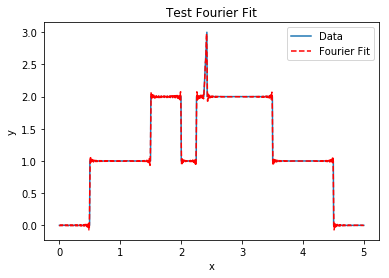

In [5]:
# Test Fourier Transform
x = np.linspace(0, 5, 1000)
y = 2.5-np.abs(2.5-np.round(x%5))
y[400:450] = np.ones(50)
y[475:485] = [2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3]
testresults = chooseoptimal(x, y)
plt.plot(x, y, label='Data')
plt.plot(x, testresults[0], 'r--', label='Fourier Fit')
plt.title('Test Fourier Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

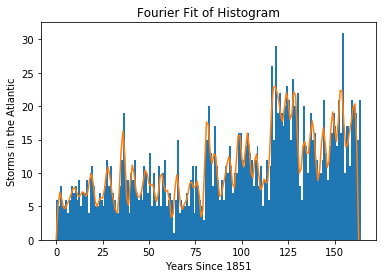

In [6]:
years = np.floor(np.array(startdates) / 10000) - 1851
yearhist = plt.hist(years, bins=(2015-1851))
yearfourier = chooseoptimal(yearhist[1][:-1], yearhist[0])
plt.plot(yearhist[1][:-1], yearfourier[0])
plt.title('Fourier Fit of Histogram')
plt.xlabel('Years Since 1851')
plt.ylabel('Storms in the Atlantic')
plt.show()

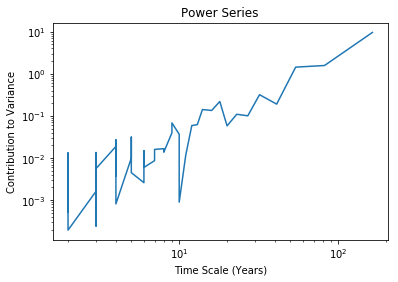

In [7]:
kmag = np.sqrt(yearfourier[1]**2 + yearfourier[2]**2)/np.arange(1, np.size(yearfourier[0])/2+1)
plt.plot((2015-1851)/np.arange(1, np.size(yearfourier[0])/2+1), kmag)
plt.title('Power Series')
plt.ylabel('Contribution to Variance')
plt.xlabel('Time Scale (Years)')
plt.xscale('log')
plt.yscale('log')
plt.show()

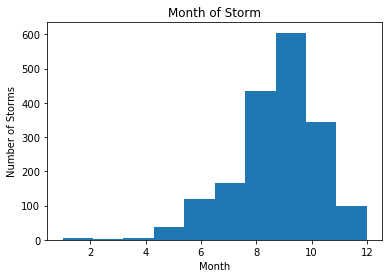

In [8]:
months = np.floor(np.mod(startdates, 10000)/100)
plt.hist(months)
plt.title('Month of Storm')
plt.xlabel('Month')
plt.ylabel('Number of Storms')
plt.show()

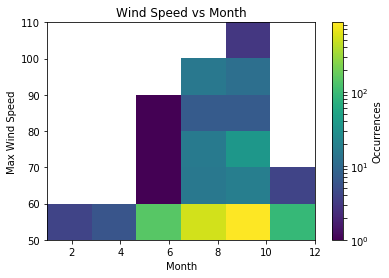

In [9]:
plt.hist2d(months, maxwind, norm=LogNorm(), bins=6)
plt.title('Wind Speed vs Month')
plt.xlabel('Month')
plt.ylabel('Max Wind Speed')
plt.colorbar(label='Occurrences')
plt.show()

The most common storms of this type seem to be in September-Octoberm with maximum wind speeds between 50 and 60 mph.

In [10]:
lats = [float(l[:-1]) for l in lats]
longs = [float(l[:-1]) for l in longs]

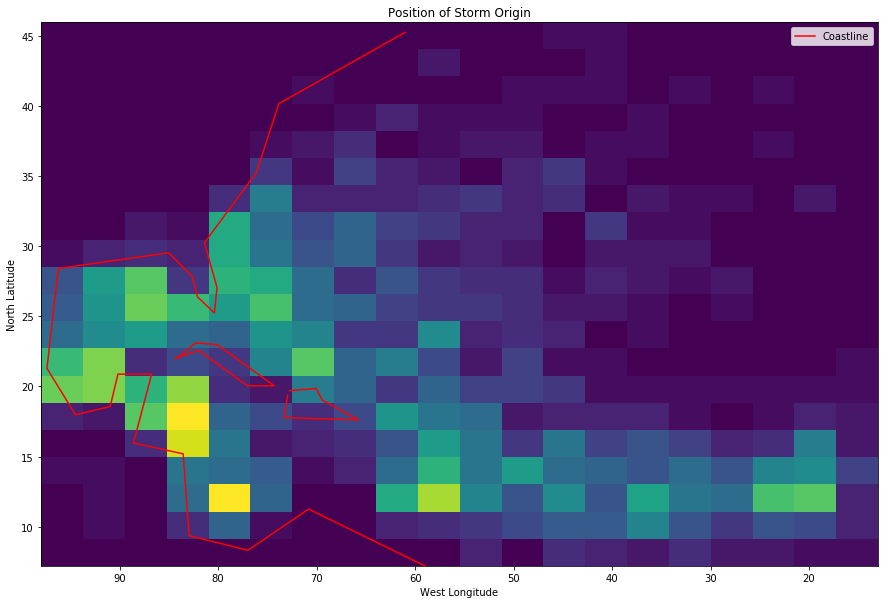

In [11]:
plt.figure(figsize=(15, 10))
histdata = plt.hist2d(longs, lats, bins=20)
flongs = [53.87, 70.82, 76.97, 82.95, 83.56, 88.60, 86.76, 90.18, 90.97, 94.49, 97.39, 96.24, 85.04, 82.63, 82.10, 80.39, 80.12, 81.40, 76.13, 73.84, 61.02]
flats = [5.43, 11.25, 8.31, 9.35, 15.19, 15.97, 20.88, 20.88, 18.57, 17.98, 21.29, 28.42, 29.54, 27.84, 26.39, 25.25, 27.06, 30.26, 35.25, 40.18, 45.28]
clongs = [84.37, 81.96, 77.04, 74.31, 80.11, 82.29, 84.17]
clats = [22.02, 22.57, 20.05, 20.05, 22.99, 23.11, 22.02]
drlongs = [72.95, 73.30, 65.75, 69.44, 70.05, 72.77]
drlats = [19.37, 17.78, 17.61, 19.03, 19.86, 19.70]
plt.plot(flongs, flats, c='r', label='Coastline')
plt.plot(clongs, clats, c='r')
plt.plot(drlongs, drlats, c='r')
plt.title('Position of Storm Origin')
plt.ylabel('North Latitude')
plt.xlabel('West Longitude')
plt.xlim(histdata[1][-1], histdata[1][0])
plt.legend()
plt.show()

The most frequent origin points for storms appear to be near (78W, 12N) and (83W, 17N), which makes sense given the coastline.

In [12]:
allids = storms['ID']
alllats = storms['Latitude']
alllongs = storms['Longitude']
allstatus = storms['Status']
alldates = storms['Date']
allmaxwind = storms['Maximum Wind']
ids = []
lats = []
longs = []
startdates = []
maxwind = []
for i in range(np.size(allids)):
    if allids[i] not in ids and allstatus[i] == ' HU':
        ids.append(allids[i])
        lats.append(alllats[i])
        longs.append(alllongs[i])
        startdates.append(alldates[i])
        maxwind.append(np.maximum(allmaxwind[i], 50))
print np.size(ids)

890


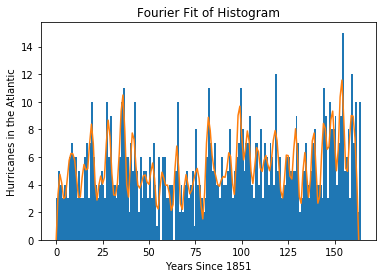

In [13]:
years = np.floor(np.array(startdates) / 10000) - 1851
yearhist = plt.hist(years, bins=(2015-1851))
yearfourier = chooseoptimal(yearhist[1][:-1], yearhist[0])
plt.plot(yearhist[1][:-1], yearfourier[0])
plt.title('Fourier Fit of Histogram')
plt.xlabel('Years Since 1851')
plt.ylabel('Hurricanes in the Atlantic')
plt.show()

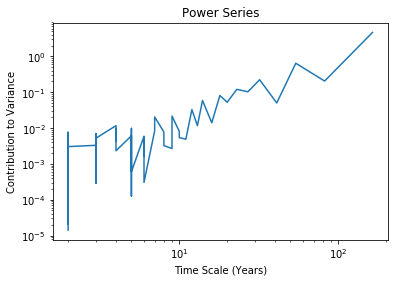

In [14]:
kmag = np.sqrt(yearfourier[1]**2 + yearfourier[2]**2)/np.arange(1, np.size(yearfourier[0])/2+1)
plt.plot((2015-1851)/np.arange(1, np.size(yearfourier[0])/2+1), kmag)
plt.title('Power Series')
plt.ylabel('Contribution to Variance')
plt.xlabel('Time Scale (Years)')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [15]:
lats = [float(l[:-1]) for l in lats]
longs = [float(l[:-1]) for l in longs]

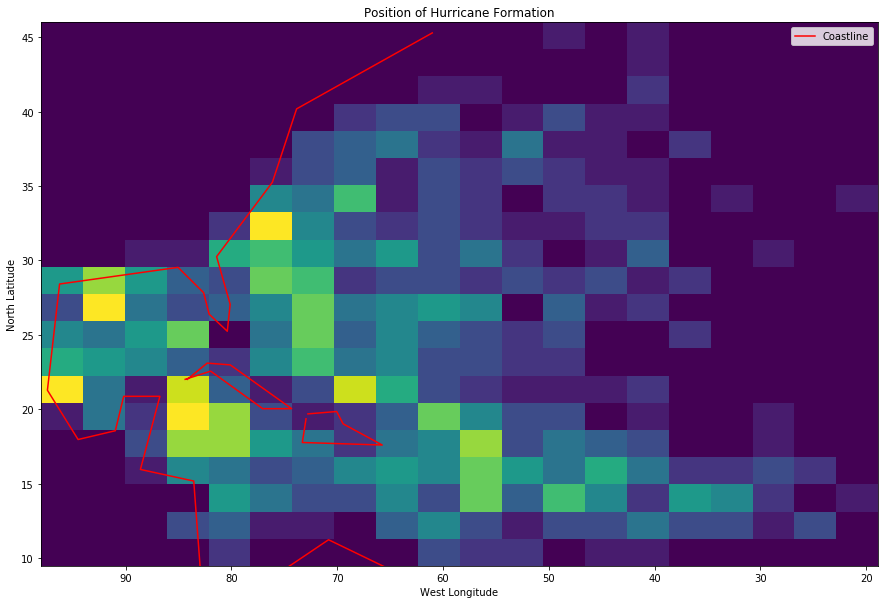

In [16]:
plt.figure(figsize=(15, 10))
histdata = plt.hist2d(longs, lats, bins=20)
flongs = [53.87, 70.82, 76.97, 82.95, 83.56, 88.60, 86.76, 90.18, 90.97, 94.49, 97.39, 96.24, 85.04, 82.63, 82.10, 80.39, 80.12, 81.40, 76.13, 73.84, 61.02]
flats = [5.43, 11.25, 8.31, 9.35, 15.19, 15.97, 20.88, 20.88, 18.57, 17.98, 21.29, 28.42, 29.54, 27.84, 26.39, 25.25, 27.06, 30.26, 35.25, 40.18, 45.28]
clongs = [84.37, 81.96, 77.04, 74.31, 80.11, 82.29, 84.17]
clats = [22.02, 22.57, 20.05, 20.05, 22.99, 23.11, 22.02]
drlongs = [72.95, 73.30, 65.75, 69.44, 70.05, 72.77]
drlats = [19.37, 17.78, 17.61, 19.03, 19.86, 19.70]
plt.plot(flongs, flats, c='r', label='Coastline')
plt.plot(clongs, clats, c='r')
plt.plot(drlongs, drlats, c='r')
plt.title('Position of Hurricane Formation')
plt.ylabel('North Latitude')
plt.xlabel('West Longitude')
plt.xlim(histdata[1][-1], histdata[1][0])
plt.legend()
plt.show()

Where hurricanes happen most makes more sense, given what we know.

In [17]:
allids = storms['ID']
alllats = storms['Latitude']
alllongs = storms['Longitude']
allstatus = storms['Status']
alldates = storms['Date']
allmaxwind = storms['Maximum Wind']
ids = []
lats = []
longs = []
dates = []
maxwind = []
for i in range(np.size(allids)):
    if allstatus[i] == ' HU':
        ids.append(allids[i])
        lats.append(alllats[i])
        longs.append(alllongs[i])
        dates.append(alldates[i])
        maxwind.append(np.maximum(allmaxwind[i], 50))
print np.size(ids)

14537


In [18]:
lats = [float(l[:-1]) for l in lats]
longs = [float(l[:-1]) for l in longs]

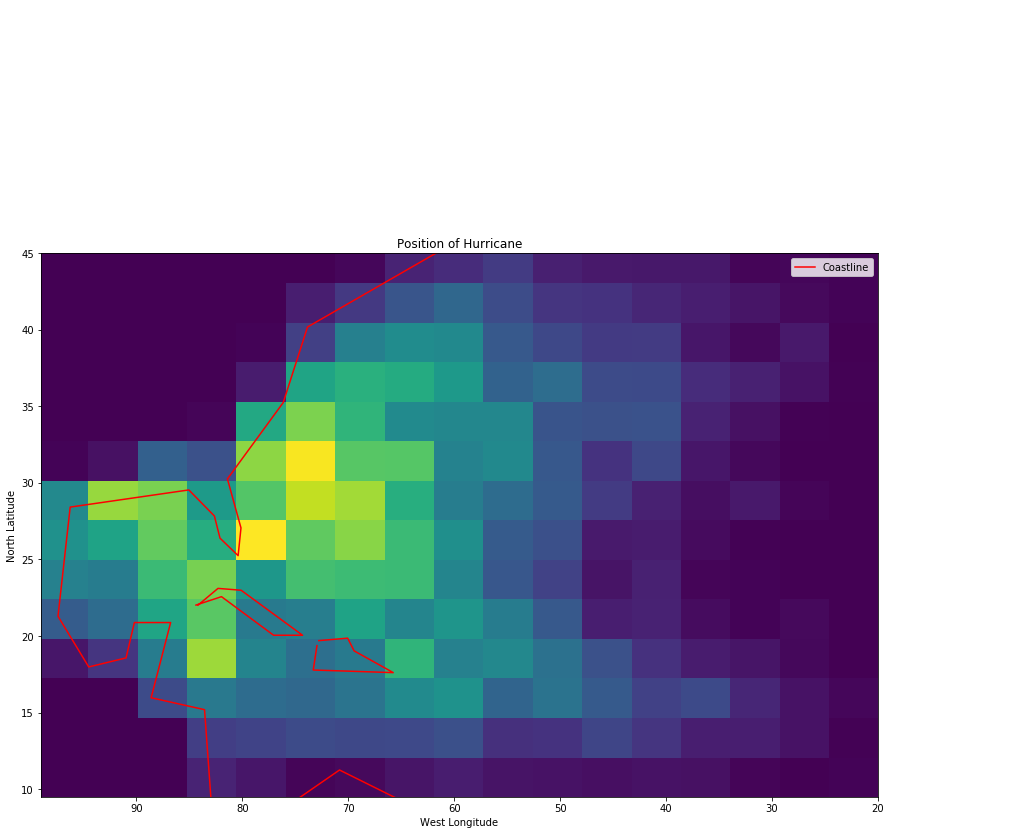

In [19]:
plt.figure(figsize=(15, 10))
histdata = plt.hist2d(longs, lats, bins=20)
flongs = [53.87, 70.82, 76.97, 82.95, 83.56, 88.60, 86.76, 90.18, 90.97, 94.49, 97.39, 96.24, 85.04, 82.63, 82.10, 80.39, 80.12, 81.40, 76.13, 73.84, 61.02]
flats = [5.43, 11.25, 8.31, 9.35, 15.19, 15.97, 20.88, 20.88, 18.57, 17.98, 21.29, 28.42, 29.54, 27.84, 26.39, 25.25, 27.06, 30.26, 35.25, 40.18, 45.28]
clongs = [84.37, 81.96, 77.04, 74.31, 80.11, 82.29, 84.17]
clats = [22.02, 22.57, 20.05, 20.05, 22.99, 23.11, 22.02]
drlongs = [72.95, 73.30, 65.75, 69.44, 70.05, 72.77]
drlats = [19.37, 17.78, 17.61, 19.03, 19.86, 19.70]
plt.plot(flongs, flats, c='r', label='Coastline')
plt.plot(clongs, clats, c='r')
plt.plot(drlongs, drlats, c='r')
plt.title('Position of Hurricane')
plt.ylabel('North Latitude')
plt.xlabel('West Longitude')
plt.xlim(99, 20)
plt.ylim(9.5, 45)
plt.legend()
plt.show()

Poor Florida.

**Evaluating the Regression Model**

In [20]:
def Pred(lat, long, lat20, long80, month, month9):
    return 1.6330045 - 0.008658*lat - 0.0082391*long + 0.0169589*month + 0.0004364*lat20 - 0.0098540*long80 - 0.0922844*month9

In [21]:
predictions = Pred(table['Lat (N)'], table['Long (W)'], table['Lat from 20'], table['Long from 80'], table['Date (Month)'], table['Month from 9'])
result = table['Hurricane']
minerror = np.size(result)
bestt = 0
ts = []
errors = []
fn = []
fp = []
for threshold in np.arange(0, 1, 0.01):
    classification = []
    for p in predictions:
        if p >= threshold:
            classification.append(1)
        else:
            classification.append(0)
    classification = np.array(classification)
    diff = np.abs(result - classification)
    error = np.sum(diff)
    if error < minerror:
        minerror = error
        bestt = threshold
    ts.append(threshold)
    errors.append(error)
    fp.append(np.size(np.where(classification > result))*1.0/(np.size(result) - np.sum(result)))
    fn.append(np.size(np.where(result > classification))*1.0/np.sum(result))
print "Lowest error: ", minerror*1.0/np.size(result), " with threshold ", bestt

Lowest error:  0.38974641675854466  with threshold  0.8


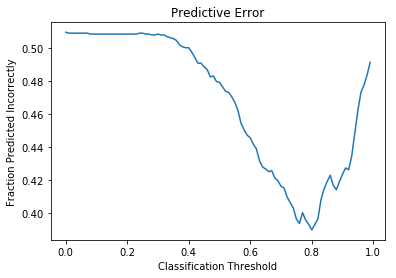

In [22]:
errors = np.array(errors)*1.0/np.size(result)
plt.plot(ts, errors)
plt.title('Predictive Error')
plt.ylabel('Fraction Predicted Incorrectly')
plt.xlabel('Classification Threshold')
plt.show()

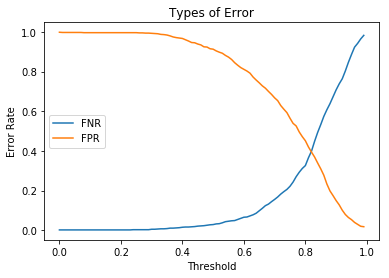

In [23]:
plt.plot(ts, fn, label="FNR")
plt.plot(ts, fp, label="FPR")
plt.title('Types of Error')
plt.ylabel('Error Rate')
plt.xlabel('Threshold')
plt.legend()
plt.show()